In [25]:
import pickle
from deap import tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
enemy_id = 1

with open(f'logBook/best_{enemy_id}_biased_mating_probobility_logBook.pkl', 'rb') as f:
    logBook = pickle.load(f)

In [26]:
# logBook.select('max')

In [58]:
# print(logBook)

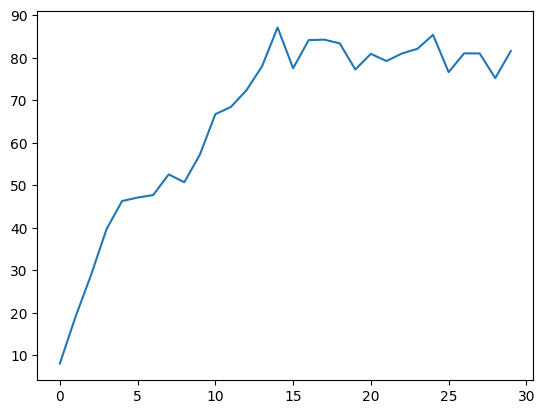

In [57]:
plt.plot(logBook.select('mean'))

In [39]:
# enemy_id = 1
# experiment_name = 'eaMuPlusLambda_optimization'

# with open(f'logBook/best_{enemy_id}_{experiment_name}_logBook.pkl', 'rb') as f:
#     logBook_MuPlusLambda = pickle.load(f)

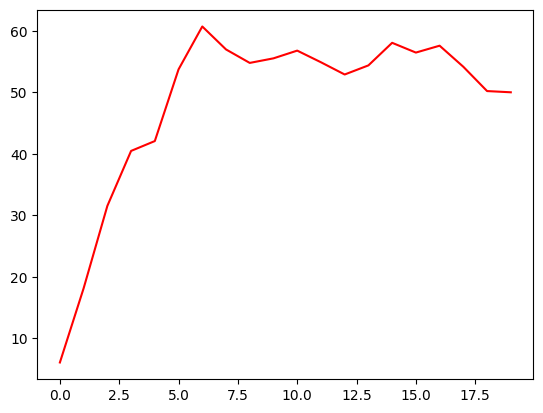

In [37]:
plt.plot(logBook.select('mean'), 'r')

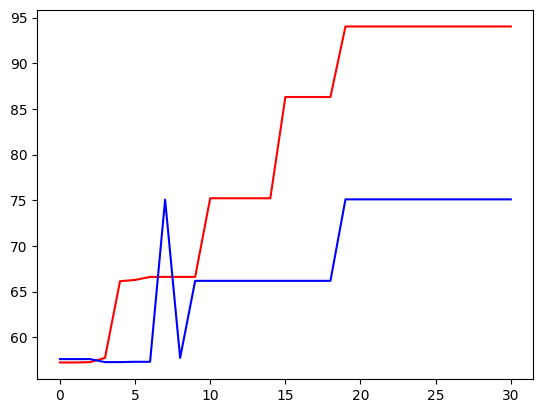

In [36]:
plt.plot(logBook_SEA.select('max'), 'r')
plt.plot(logBook_MuPlusLambda.select('max'), 'b')